<a href="https://colab.research.google.com/github/bhavinithak/DeepLearning_Pytorch/blob/main/DogBreedIdentification_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timm

In [2]:
from fastai.vision.all import *
import timm

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

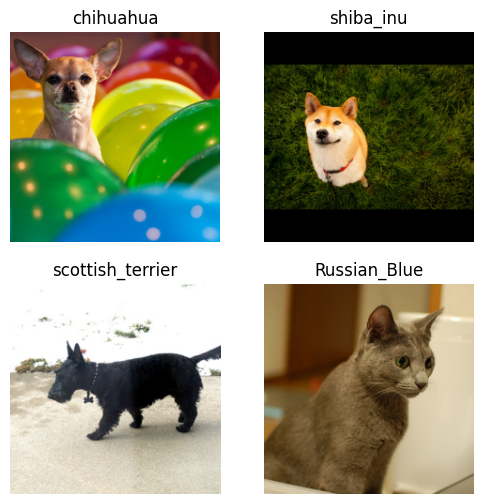

In [4]:
dls.show_batch(max_n=4)

In [5]:
learn=vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 93.6MB/s]


In [6]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.478238,0.349205,0.109608,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.479483,0.374317,0.114344,01:00
1,0.275810,0.265156,0.077808,01:05
2,0.128082,0.221576,0.071042,00:52


In [7]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [9]:
learn1=vision_learner(dls,'convnextv2_tiny',metrics=error_rate)
learn1.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.894006,0.229046,0.069012,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.246903,0.183422,0.061570,02:13
1,0.170512,0.146065,0.043978,02:12
2,0.105793,0.146198,0.043302,02:11


In [10]:
learn1.export('dog_breeder_model.pkl')

In [17]:
!zip -r '/content/dog_breeder_model.pkl.zip' '/content/dog_breeder_model.pkl'

  adding: content/dog_breeder_model.pkl (deflated 7%)


In [18]:
!tar chvfz dog_breeder_model.pkl.tar.gz '/content/dog_breeder_model.pkl'

tar: Removing leading `/' from member names
/content/dog_breeder_model.pkl
tar: Removing leading `/' from hard link targets


In [19]:
!du -sh /content/dog_breeder_model.pkl

110M	/content/dog_breeder_model.pkl


In [21]:
!du -sh /content/dog_breeder_model.pkl.zip

102M	/content/dog_breeder_model.pkl.zip


In [22]:
!du -sh /content/dog_breeder_model.pkl.tar.gz

102M	/content/dog_breeder_model.pkl.tar.gz
